In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from collections import Counter
import joblib


In [ ]:
#load cleaned and preprocessed data

data = pd.read_csv('C:/Projects_VScode/Sentiment Analysis/static/IMDB Dataset Cleaned.csv')

In [ ]:
#Added outcome col where marked 1 for positive and 0 for negative

data["outcome"] = data['sentiment'].apply(lambda x: 1 if x=="positive" else 0)
data.head()

,review,sentiment,outcome
0,review mention oz episod youll hook right exac...,positive,1
1,wonder littl product techniqu unassum oldtimeb...,positive,1
2,thought wonder way spend hot summer weekend si...,positive,1
3,basic there famili littl boy jake think there ...,negative,0
4,petter mattei love money visual stun mr mattei...,positive,1


#Featurization, multiple approaches can be used:
1. Bag of words

In [ ]:
#Bag of words
vectorizer = CountVectorizer()
Vectorize_dataset = vectorizer.fit_transform(data['review'])
Vectorize_dataset.get_shape()


#Save vectorize_dataset 
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [ ]:
#Defined function to vectorize the text data

def vectorize_text(text):
    return vectorizer.transform([text])

Train test split

In [ ]:
#train test split

x_train, x_test, y_train, y_test = train_test_split(X, data['outcome'], test_size=0.2, random_state=42)

Accuracy: 0.8604
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      4961
           1       0.87      0.85      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



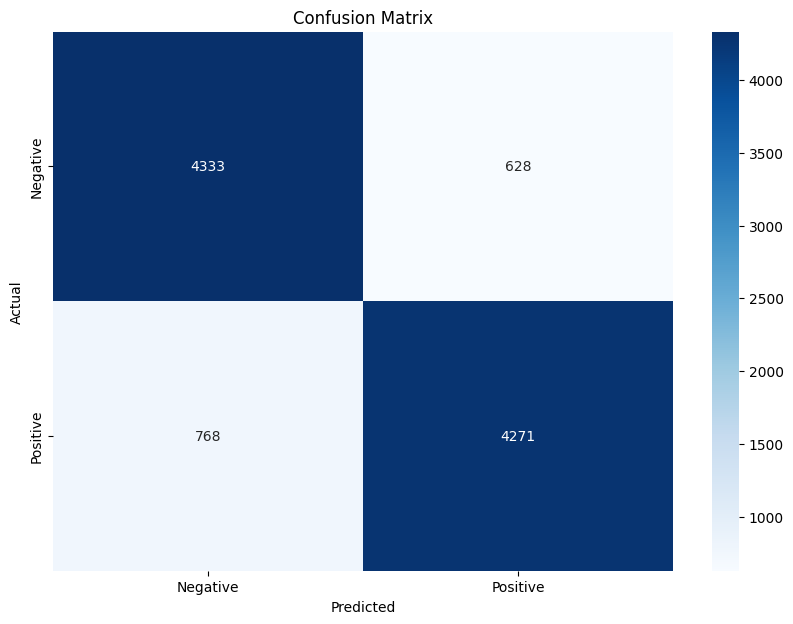

In [ ]:
#building Model Naive bias model

model = MultinomialNB() 
model.fit(x_train, y_train)

# Predicting on test data
y_pred = model.predict(x_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


# Visualizing the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Saved model for future prediction

joblib.dump(model, "naive_bayes_model.pkl")

['naive_bayes_model.pkl']

In [40]:
# Word count of the reviews whose sentiment negative
negative_reviews = data[data['outcome'] == 0]['review']
word_counts = Counter(' '.join(negative_reviews).split())
most_common_words = word_counts.most_common(20)
most_common_words

[('bad', 14192),
 ('dont', 10268),
 ('act', 10189),
 ('much', 9914),
 ('peopl', 9381),
 ('end', 9327),
 ('thing', 9244),
 ('could', 9038),
 ('think', 8957),
 ('made', 8395),
 ('plot', 8238),
 ('say', 8214),
 ('first', 8194),
 ('way', 8013),
 ('seem', 7987),
 ('well', 7845),
 ('know', 7761),
 ('tri', 7543),
 ('want', 7172),
 ('play', 7150)]

In [41]:
positive_reviews = data[data['outcome'] == 1]['review']
positive_word_counts = Counter(' '.join(positive_reviews).split())
positive_most_common_words = positive_word_counts.most_common(20)   
positive_most_common_words

[('great', 12885),
 ('love', 12095),
 ('well', 11465),
 ('also', 10704),
 ('play', 9849),
 ('life', 9136),
 ('much', 9032),
 ('first', 8966),
 ('end', 8828),
 ('peopl', 8671),
 ('way', 8516),
 ('think', 8385),
 ('best', 8336),
 ('mani', 7619),
 ('year', 7335),
 ('work', 7255),
 ('know', 7122),
 ('made', 7022),
 ('two', 6930),
 ('thing', 6871)]